In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore

In [3]:
df = pd.read_csv('Merged_DatasetV2.csv')

C:\Users\Vashist\AppData\Local\Temp\ipykernel_20040\4258154512.py:1: DtypeWarning: Columns (7,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Merged_DatasetV2.csv')


In [23]:
df

,Unnamed: 0,id,type,type-id,score,name,address,coordinates,area,life-span,...,latitude,longitude,city,state,county,country,lifespan_years,status,services_offered,numerical_lifespan_years
0,0,f9a1fd95-4c6d-43a6-bb31-4ee8d5a44a8b,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,Columbia (CBS) Studio ‘B’,"49 East 52nd Street, Manhattan, New York City","{'latitude': '40.759164', 'longitude': '-73.97...","{'id': '74e50e58-5deb-4b99-93a2-decbb365c07f',...",{'ended': None},...,40.759164,-73.974123,Test Restaurant,New York,NaN,US,NaN,Active,NaN,NaN
1,1,42e9fa7c-a981-44f9-943c-bf39a8c6ce8d,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,New Theatre Oxford,"George St, Oxford OX1 2AG","{'latitude': '51.753951', 'longitude': '-1.260...","{'id': '33587495-c775-4483-b819-931c4cf438cd',...",{'ended': None},...,51.753951,-1.260011,Victoria House Hotel,England,Oxfordshire,GB,NaN,Active,NaN,NaN
2,2,34e7351d-715d-4b20-a5d6-3c0bd717eb1d,Religious building,a120ca4a-69e9-3c0e-bc09-21cae26eb621,100,Santuario della Beata Vergine di Ariadello,NaN,"{'latitude': '45.316087', 'longitude': '9.8651...","{'id': '686e7b1e-613f-419c-bcc1-1e84df36586a',...","{'begin': '1666', 'ended': None}",...,45.316087,9.865165,Genivolta,NaN,NaN,IT,359.0,Active,NaN,359.0
3,3,0ad32768-514b-410f-9d5a-40ebb0c3373c,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,ROKU-st,〒106-0032 東京都港区六本木 3-4-24 六本木足立ビルB1F,"{'latitude': '35.664122', 'longitude': '139.72...","{'id': 'd9fd27ac-b36f-492b-b598-039ee0dd08c1',...",{'ended': None},...,35.664122,139.729426,Tenso Jinja,NaN,NaN,JP,NaN,Active,NaN,NaN
4,4,0b050655-48da-4be7-b5de-7a3ee7370b9e,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,Rätschenmühle,"Schlachthausstraße 22, 73312 Geislingen/Steige","{'latitude': '48.627518', 'longitude': '9.8256...","{'id': '4518c94c-b6ee-40d0-b4b6-fc27b06fa011',...",{'ended': None},...,48.627518,9.825691,Geislingen an der Steige,NaN,NaN,DE,NaN,Active,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69658,69658,8f544074-fecb-49af-a761-c6e8b35d8486,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,Full and Empty,NaN,NaN,"{'id': '29a709d8-0320-493e-8d0c-f2c386662b7f',...",{'ended': None},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,recorded at,NaN
69659,69659,90f30083-88db-49a7-8ec1-06d9ca2aa065,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,Plama,NaN,NaN,"{'id': '70cd6f66-9881-4105-8096-8721a1887aad',...",{'ended': None},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,recorded at,NaN
69660,69660,6b94062e-78a3-46e8-b861-d801dfe27376,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,Studio Toupie,NaN,NaN,NaN,{'ended': None},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
69661,69661,f7362574-05ac-4c21-8196-26a09d6e5fe7,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,FatCat Studio,NaN,NaN,NaN,{'ended': None},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN


C:\Users\Vashist\AppData\Local\Temp\ipykernel_20040\4016686437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["type"], order=df["type"].value_counts().index, palette="coolwarm")


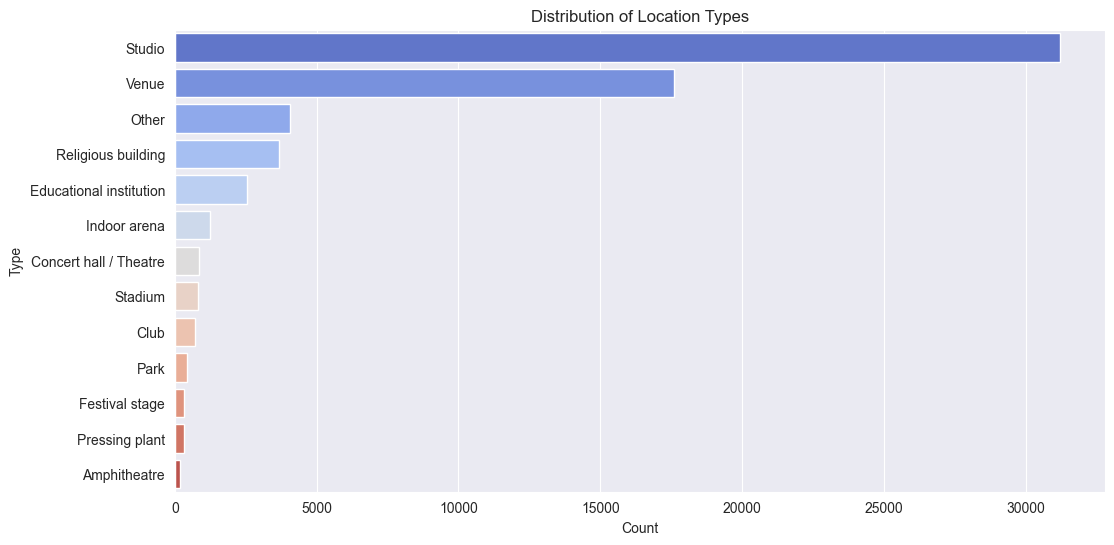

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["type"], order=df["type"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Location Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

In [14]:
numerical_columns = ["lifespan_years"]
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [16]:
outliers = {}
for col in numerical_columns:
    if df[col].notnull().sum() > 0:
        non_null_series = df[col].dropna()
        z_scores = zscore(non_null_series)
        outlier_indices = non_null_series.index[np.abs(z_scores) > 3]
        outliers[col] = df.loc[outlier_indices, col]

In [17]:
outlier_counts = {col: len(outliers[col]) for col in outliers}

In [24]:
print(outlier_counts)

{'lifespan_years': 334}


In [31]:
max_lifespan = df["lifespan_years"].dropna().quantile(0.95)  # Ignore extreme outliers
bins = np.linspace(0, max_lifespan, 20)  # Create bins within the focused range

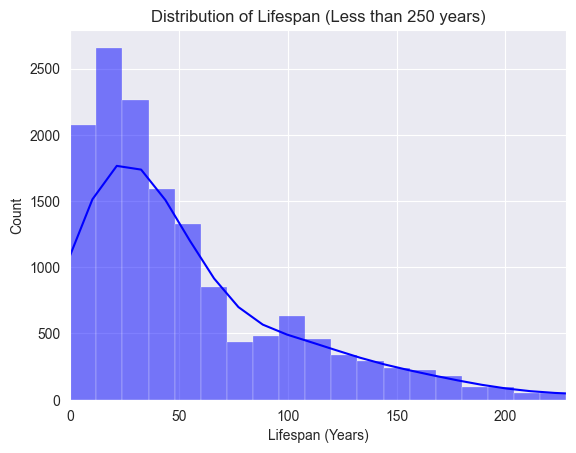

In [35]:
sns.histplot(df["lifespan_years"].dropna(), bins=bins, kde=True, color="blue")
plt.title("Distribution of Lifespan (Less than 250 years)")
plt.xlabel("Lifespan (Years)")
plt.ylabel("Count")
plt.xlim(0, max_lifespan)

plt.show()

In [29]:
import geopandas as gpd
from shapely.geometry import Point

In [44]:
world = gpd.read_file("ne_110m_admin_0_countries.shx")
if world.crs is None:
    world.set_crs("EPSG:4326", inplace=True)

In [45]:
df

,Unnamed: 0,id,type,type-id,score,name,address,coordinates,area,life-span,...,latitude,longitude,city,state,county,country,lifespan_years,status,services_offered,numerical_lifespan_years
0,0,f9a1fd95-4c6d-43a6-bb31-4ee8d5a44a8b,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,Columbia (CBS) Studio ‘B’,"49 East 52nd Street, Manhattan, New York City","{'latitude': '40.759164', 'longitude': '-73.97...","{'id': '74e50e58-5deb-4b99-93a2-decbb365c07f',...",{'ended': None},...,40.759164,-73.974123,Test Restaurant,New York,NaN,US,NaN,Active,NaN,NaN
1,1,42e9fa7c-a981-44f9-943c-bf39a8c6ce8d,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,New Theatre Oxford,"George St, Oxford OX1 2AG","{'latitude': '51.753951', 'longitude': '-1.260...","{'id': '33587495-c775-4483-b819-931c4cf438cd',...",{'ended': None},...,51.753951,-1.260011,Victoria House Hotel,England,Oxfordshire,GB,NaN,Active,NaN,NaN
2,2,34e7351d-715d-4b20-a5d6-3c0bd717eb1d,Religious building,a120ca4a-69e9-3c0e-bc09-21cae26eb621,100,Santuario della Beata Vergine di Ariadello,NaN,"{'latitude': '45.316087', 'longitude': '9.8651...","{'id': '686e7b1e-613f-419c-bcc1-1e84df36586a',...","{'begin': '1666', 'ended': None}",...,45.316087,9.865165,Genivolta,NaN,NaN,IT,359.0,Active,NaN,359.0
3,3,0ad32768-514b-410f-9d5a-40ebb0c3373c,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,ROKU-st,〒106-0032 東京都港区六本木 3-4-24 六本木足立ビルB1F,"{'latitude': '35.664122', 'longitude': '139.72...","{'id': 'd9fd27ac-b36f-492b-b598-039ee0dd08c1',...",{'ended': None},...,35.664122,139.729426,Tenso Jinja,NaN,NaN,JP,NaN,Active,NaN,NaN
4,4,0b050655-48da-4be7-b5de-7a3ee7370b9e,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,Rätschenmühle,"Schlachthausstraße 22, 73312 Geislingen/Steige","{'latitude': '48.627518', 'longitude': '9.8256...","{'id': '4518c94c-b6ee-40d0-b4b6-fc27b06fa011',...",{'ended': None},...,48.627518,9.825691,Geislingen an der Steige,NaN,NaN,DE,NaN,Active,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26722,26722,a84f246f-23e6-4279-b1c4-6fccda96af9a,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,Windfall Dutch Barn,"2009 Clinton Rd., Cherry Valley, NY 13320","{'latitude': '42.858889', 'longitude': '-74.74...","{'id': '1aac6e9d-2a0d-40c9-9ed2-7afa910309b6',...",{'ended': None},...,42.858889,-74.744444,Salt Springville,New York,NaN,US,NaN,Active,recorded at,NaN
26723,26723,ba096a11-9e20-4883-b5ff-fb93cbae558c,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,Masterpiece Mastering London,"Unit 20 The Talina Centre, Bagleys Lane, Fulha...","{'latitude': '51.474475', 'longitude': '-0.186...","{'id': '5f6f6d2f-eed5-449d-82a5-613f1380f2e6',...",{'ended': None},...,51.474475,-0.186585,DoubleTree by Hilton Hotel London - Chelsea,England,Greater London,GB,NaN,Active,NaN,NaN
26724,26724,6ab2dcaf-66cd-4f61-8d30-29e8e0be9df3,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,Hammersmith Palais,"242 Shepherd's Bush Road, London, W6 7NL","{'latitude': '51.494052', 'longitude': '-0.224...","{'id': '8147ca78-c199-4083-a9a9-971f0d13e071',...","{'begin': '1919-10-28', 'end': '2007-04', 'end...",...,51.494052,-0.224087,Euro Hotel Hammersmith,England,Greater London,GB,88.0,Ended,NaN,88.0
26725,26725,5ffbe933-6531-486a-91ea-553ee9036cd8,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,名古屋BOTTOM LINE,〒464-0850 愛知県名古屋市千種区今池4-7-11,"{'latitude': '35.170066', 'longitude': '136.93...","{'id': '0e9a8820-72d2-430e-bdce-377060529d06',...","{'begin': '1989', 'ended': None}",...,35.170066,136.938517,Imaike-eki,NaN,NaN,JP,36.0,Active,recorded at,36.0


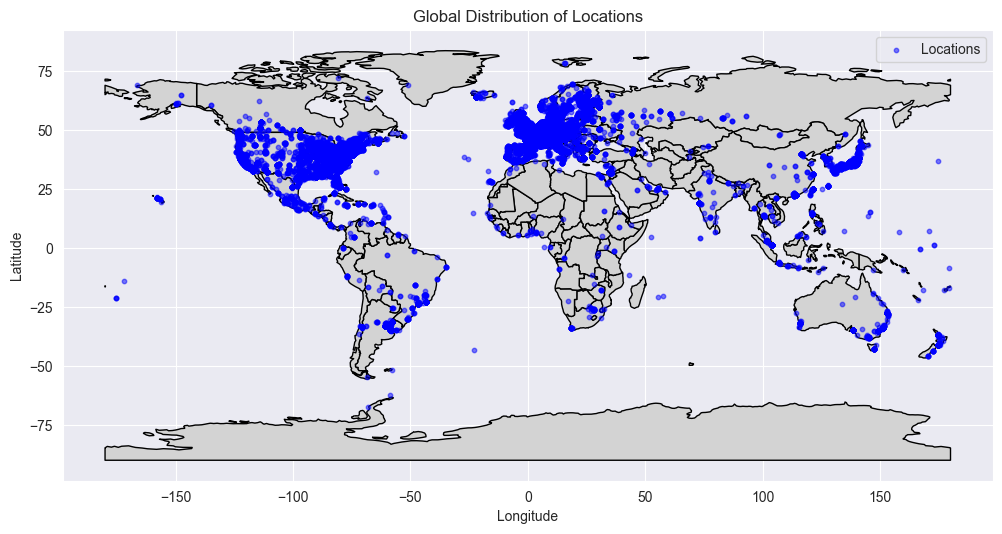

In [50]:
df = df[(df["longitude"].between(-180, 180)) & (df["latitude"].between(-90, 90))]

geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(12, 6))
world.to_crs("EPSG:4326").plot(ax=ax, color="lightgray", edgecolor="black")

gdf.plot(ax=ax, markersize=10, alpha=0.5, color="blue", label="Locations")

plt.title("Global Distribution of Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()